In [18]:
# Импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
sns.set_style("whitegrid")

%matplotlib inline

SEED = 42

import sklearn
# from sklearn import metrics #метрики
# from sklearn import model_selection #методы разделения и валидации
# from sklearn import linear_model #линейные модели
# from sklearn import tree #деревья решений

# from scipy import stats
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_validate
# from sklearn.pipeline import Pipeline

import sympy

from sympy import (
    Symbol, 
    S,
    simplify, 
    latex,
    sin,
    cos,
    exp,
    log,
    sqrt,
    FiniteSet,
    Union,
    Interval,
    Contains,
    ConditionSet,
    Eq,
    solveset, solve,
    diff,
    limit,
    im,
    N,
    oo
)

from sympy.calculus.util import (
    function_range,
    continuous_domain
)

import scipy

from scipy.optimize import minimize, least_squares

from IPython.display import display, Markdown

import sys
import os
from pathlib import Path

# Определяем путь к директории ноутбука
# Простое решение: определяем папку, где находится файл ноутбука
notebook_dir = None

# Способ 1: Используем библиотеку ipynbname (самый надежный способ)
# Если библиотека не установлена, она будет установлена автоматически
try:
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except ImportError:
    # Устанавливаем библиотеку, если её нет
    import subprocess
    import sys
    print("📦 Устанавливаю библиотеку ipynbname для определения пути к ноутбуку...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "ipynbname", "-q"])
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except Exception as e:
    print(f"⚠️  Не удалось использовать ipynbname: {e}")

# Способ 2: Пробуем получить путь через IPython (запасной вариант)
if notebook_dir is None:
    try:
        from IPython import get_ipython
        ipython = get_ipython()
        if ipython is not None:
            if hasattr(ipython, 'start_dir'):
                notebook_dir = str(Path(ipython.start_dir).resolve())
    except:
        pass

# Способ 3: Если не удалось определить, выводим ошибку
if notebook_dir is None:
    print(f"❌ ОШИБКА: Не удалось определить папку ноутбука!")
    print(f"   Текущая рабочая директория: {os.getcwd()}")
    print(f"   Установите библиотеку: pip install ipynbname")
    raise RuntimeError("Не удалось определить директорию ноутбука. Установите: pip install ipynbname")

# Выводим информацию для диагностики
print(f"📂 Директория ноутбука: {notebook_dir}")
print(f"📂 Текущая рабочая директория (до chdir): {os.getcwd()}")

# Добавляем путь к директории ноутбука в sys.path (в начало для приоритета)
if notebook_dir not in sys.path:
    sys.path.insert(0, notebook_dir)

# Меняем рабочую директорию на директорию ноутбука, чтобы относительные пути работали
os.chdir(notebook_dir)
print(f"📂 Рабочая директория установлена: {os.getcwd()}")

# Импортируем helper (если существует)
try:
    from helper.functionanalyzer import FunctionAnalyzer
except ImportError:
    print("⚠️  Модуль helper.functionanalyzer не найден (это нормально, если он не используется)")


from tqdm import tqdm
import time

print(f'Numpy version {np.__version__}')
print(f'Pandas version {pd.__version__}')
print(f'sklearn version {sklearn.__version__}')
print(f'scipy version {scipy.__version__}')
print(f'sympy version {sympy.__version__}')

from sklearnex import patch_sklearn, config_context
patch_sklearn()

import cupy as cp

# Пробуем импортировать nvmath независимо от версии Python
# (модуль может быть обновлен и поддерживать более новые версии)
try:
    import nvmath
    print(f"✅ Модуль nvmath успешно импортирован (Python {sys.version_info.major}.{sys.version_info.minor})")
except ImportError as e:
    # Проверяем, связана ли ошибка с версией Python
    if sys.version_info >= (3, 13):
        print(f"⚠️  Модуль nvmath не установлен или не поддерживает Python {sys.version_info.major}.{sys.version_info.minor}")
        print(f"   Попробуйте обновить nvmath: pip install --upgrade nvmath")
        print(f"   Или используйте Python 3.12 или ниже для полной совместимости")
    else:
        print(f"⚠️  Модуль nvmath не установлен (Python {sys.version_info.major}.{sys.version_info.minor})")
        print(f"   Установите: pip install nvmath")
except Exception as e:
    print(f"⚠️  Ошибка при импорте nvmath: {e}")



📂 Директория ноутбука: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 6\MATH&ML-9. Математика ансамблевых методов
📂 Текущая рабочая директория (до chdir): C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 6\MATH&ML-9. Математика ансамблевых методов
📂 Рабочая директория установлена: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 6\MATH&ML-9. Математика ансамблевых методов
Numpy version 1.26.4
Pandas version 2.2.3
sklearn version 1.5.2
scipy version 1.15.1
sympy version 1.13.3
⚠️  Модуль nvmath не установлен или не поддерживает Python 3.13
   Попробуйте обновить nvmath: pip install --upgrade nvmath
   Или используйте Python 3.12 или ниже для полной совместимости


Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


## Задание 2.2

1/1 point (graded)

4.4, 3.8, 4.8, 4.0, 3.4, 4.2, 5.2

Вычислите дисперсию для этого ряда, используя формулу дисперсии для дискретного либо интервального вариационного ряда.

Результат округлите до трёх знаков после точки-разделителя.

In [19]:
import numpy as np

# Исходные данные
data = [4.4, 3.8, 4.8, 4.0, 3.4, 4.2, 5.2]

# Среднее арифметическое
mean = np.mean(data)

# Дисперсия по формуле для дискретного ряда (деление на n)
variance = np.sum((np.array(data) - mean) ** 2) / len(data)

# Округление до 3 знаков
variance_rounded = round(variance, 3)

print("Дисперсия:", variance_rounded)

Дисперсия: 0.317


Объёмная и содержательная практика у нас ещё впереди, но в качестве разминки давайте поработаем с уже известным вам датасетом о вине, который можно скачать здесь.

Ранее вы обучали на данных только один алгоритм, а теперь мы попробуем сравнить несколько.

В рамках следующих двух заданий сравните несколько методов классификации: логистическую регрессию, дерево решений и бэггинг. Это позволит вам увидеть, как меняется качество в зависимости от выбора того или иного алгоритма.

## Задание 2.7

0.0/2.0 points (graded)

Подготовьте данные к классификации. Условно разделите вино на хорошее и плохое. 

Хорошим вином будем называть то, параметр quality которого — 6 и более.

Разделите выборку на обучающую и тестовую в соотношении 70/30, в качестве значения параметра random_state возьмите число 42.

Для начала обучите два классификатора: логистическую регрессию (с параметрами по умолчанию) и дерево решений (random_state = 42, максимальная глубина — 10).


1. Введите значение F1-score для классификатора, который показал наилучшее значение. Ответ округлите до трёх знаков после точки-разделителя.


 
2. Какой алгоритм показал наилучший результат?

Логистическая регрессия
Решающее дерево



In [28]:
# Загружаем датасет
# Используем index_col=0, чтобы столбец "Unnamed: 0" стал индексом, а не отдельным столбцом
df = pd.read_csv('data/wineQualityReds.csv', index_col=0)
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1599 entries, 1 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [30]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [31]:
df.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

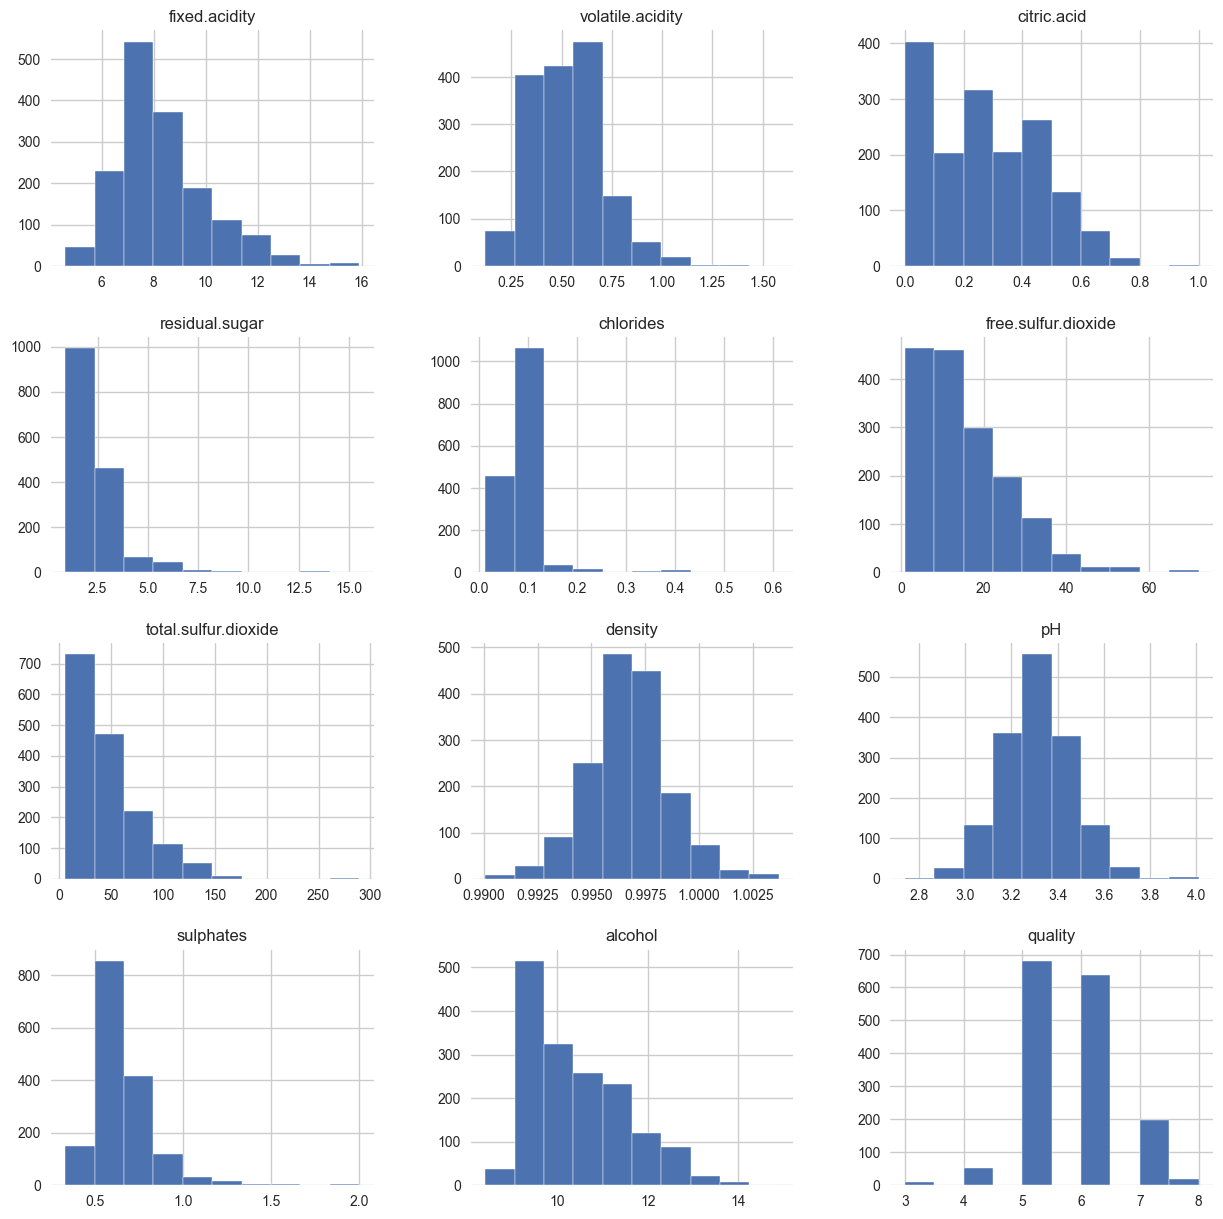

In [32]:
df.hist(figsize=(15, 15));

In [33]:
# Подготовка данных к классификации
# Создаем бинарную целевую переменную: quality >= 6 = хорошее вино (1), иначе плохое (0)
df['is_good'] = (df['quality'] >= 6).astype(int)

# Проверяем распределение классов
print("Распределение классов:")
print(df['is_good'].value_counts())
print(f"\nДоля хорошего вина: {df['is_good'].mean():.2%}")

# Разделяем на признаки (X) и целевую переменную (y)
# Исключаем quality и is_good из признаков
X = df.drop(['quality', 'is_good'], axis=1)
y = df['is_good']

print(f"\nФорма признаков X: {X.shape}")
print(f"Форма целевой переменной y: {y.shape}")
print(f"\nНазвания признаков:")
print(X.columns.tolist())


Распределение классов:
is_good
1    855
0    744
Name: count, dtype: int64

Доля хорошего вина: 53.47%

Форма признаков X: (1599, 11)
Форма целевой переменной y: (1599,)

Названия признаков:
['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [34]:
# Разделяем выборку на обучающую и тестовую в соотношении 70/30
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,      # 30% для теста
    random_state=SEED,  # SEED = 42 (определен в ячейке 0)
    stratify=y          # Сохраняем пропорции классов в обеих выборках
)

print(f"Обучающая выборка: {X_train.shape[0]} образцов ({X_train.shape[0]/len(df):.1%})")
print(f"Тестовая выборка: {X_test.shape[0]} образцов ({X_test.shape[0]/len(df):.1%})")
print(f"\nРаспределение классов в обучающей выборке:")
print(y_train.value_counts())
print(f"\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts())


Обучающая выборка: 1119 образцов (70.0%)
Тестовая выборка: 480 образцов (30.0%)

Распределение классов в обучающей выборке:
is_good
1    598
0    521
Name: count, dtype: int64

Распределение классов в тестовой выборке:
is_good
1    257
0    223
Name: count, dtype: int64


In [36]:
# Обучение двух классификаторов
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report

# 1. Логистическая регрессия (с параметрами по умолчанию)
print("=" * 60)
print("1. ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ")
print("=" * 60)
lr_model = LogisticRegression(random_state=SEED)
lr_model.fit(X_train, y_train)

# Предсказания
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# F1-score
f1_train_lr = f1_score(y_train, y_train_pred_lr)
f1_test_lr = f1_score(y_test, y_test_pred_lr)

print(f"F1-score на обучающей выборке: {f1_train_lr:.4f}")
print(f"F1-score на тестовой выборке: {f1_test_lr:.4f}")
print("\nОтчет о классификации на тестовой выборке:")
print(classification_report(y_test, y_test_pred_lr))

# 2. Дерево решений (random_state=42, max_depth=10)
print("\n" + "=" * 60)
print("2. ДЕРЕВО РЕШЕНИЙ")
print("=" * 60)
dt_model = DecisionTreeClassifier(random_state=SEED, max_depth=10)
dt_model.fit(X_train, y_train)

# Предсказания
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# F1-score
f1_train_dt = f1_score(y_train, y_train_pred_dt)
f1_test_dt = f1_score(y_test, y_test_pred_dt)

print(f"F1-score на обучающей выборке: {f1_train_dt:.4f}")
print(f"F1-score на тестовой выборке: {f1_test_dt:.4f}")
print("\nОтчет о классификации на тестовой выборке:")
print(classification_report(y_test, y_test_pred_dt))

# Сравнение результатов
print("\n" + "=" * 60)
print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ")
print("=" * 60)
print(f"Логистическая регрессия - F1-score (тест): {f1_test_lr:.4f}")
print(f"Дерево решений          - F1-score (тест): {f1_test_dt:.4f}")

if f1_test_lr > f1_test_dt:
    print(f"\n✅ Лучший результат: ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ (F1 = {f1_test_lr:.4f})")
    best_model = "Логистическая регрессия"
    best_f1 = f1_test_lr
else:
    print(f"\n✅ Лучший результат: ДЕРЕВО РЕШЕНИЙ (F1 = {f1_test_dt:.4f})")
    best_model = "Решающее дерево"
    best_f1 = f1_test_dt

print(f"\nОтвет для задания:")
print(f"1. F1-score лучшего классификатора: {best_f1:.3f}")
print(f"2. Алгоритм с наилучшим результатом: {best_model}")


1. ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ
F1-score на обучающей выборке: 0.7566
F1-score на тестовой выборке: 0.7495

Отчет о классификации на тестовой выборке:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       223
           1       0.75      0.75      0.75       257

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480


2. ДЕРЕВО РЕШЕНИЙ
F1-score на обучающей выборке: 0.9320
F1-score на тестовой выборке: 0.7549

Отчет о классификации на тестовой выборке:
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       223
           1       0.77      0.74      0.75       257

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480


СРАВНЕНИЕ РЕЗУЛЬТАТОВ
Логистическая регрессия - F1-score (тес

## Задание 2.8
1 point possible (graded)
Обучите модель с использованием бэггинга (класс BaggingClassifier с random_state=42).

Возьмите из предыдущего задания алгоритм, показавший наилучшее качество, и укажите для него новое количество моделей — 1500. Вычислите новое значение F1-score.

In [37]:
# Обучение модели с использованием бэггинга
from sklearn.ensemble import BaggingClassifier

# Базовый алгоритм - дерево решений (показало лучший результат в задании 2.7)
# Используем те же параметры: random_state=42, max_depth=10
base_estimator = DecisionTreeClassifier(random_state=SEED, max_depth=10)

# Создаем BaggingClassifier с 1500 моделями
bagging_model = BaggingClassifier(
    estimator=base_estimator,
    n_estimators=1500,        # Количество моделей в ансамбле
    random_state=SEED,        # random_state=42
    n_jobs=-1                 # Использовать все доступные ядра процессора
)

print("=" * 60)
print("БЭГГИНГ НА ОСНОВЕ ДЕРЕВА РЕШЕНИЙ")
print("=" * 60)
print(f"Базовый алгоритм: DecisionTreeClassifier (max_depth=10)")
print(f"Количество моделей в ансамбле: 1500")
print(f"random_state: {SEED}")
print("\nОбучаю модель...")

# Обучаем модель
bagging_model.fit(X_train, y_train)

# Предсказания
y_train_pred_bag = bagging_model.predict(X_train)
y_test_pred_bag = bagging_model.predict(X_test)

# F1-score
f1_train_bag = f1_score(y_train, y_train_pred_bag)
f1_test_bag = f1_score(y_test, y_test_pred_bag)

print("Обучение завершено!\n")
print(f"F1-score на обучающей выборке: {f1_train_bag:.4f}")
print(f"F1-score на тестовой выборке: {f1_test_bag:.4f}")

print("\nОтчет о классификации на тестовой выборке:")
print(classification_report(y_test, y_test_pred_bag))

# Сравнение с исходной моделью
print("\n" + "=" * 60)
print("СРАВНЕНИЕ С ИСХОДНОЙ МОДЕЛЬЮ")
print("=" * 60)
print(f"Дерево решений (1 модель)    - F1-score: {f1_test_dt:.4f}")
print(f"Бэггинг (1500 моделей)       - F1-score: {f1_test_bag:.4f}")
print(f"Улучшение: {f1_test_bag - f1_test_dt:+.4f}")

print(f"\n✅ Ответ для задания:")
print(f"F1-score модели с бэггингом: {f1_test_bag:.3f}")


БЭГГИНГ НА ОСНОВЕ ДЕРЕВА РЕШЕНИЙ
Базовый алгоритм: DecisionTreeClassifier (max_depth=10)
Количество моделей в ансамбле: 1500
random_state: 42

Обучаю модель...
Обучение завершено!

F1-score на обучающей выборке: 0.9891
F1-score на тестовой выборке: 0.7969

Отчет о классификации на тестовой выборке:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       223
           1       0.80      0.79      0.80       257

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.78      0.78      0.78       480


СРАВНЕНИЕ С ИСХОДНОЙ МОДЕЛЬЮ
Дерево решений (1 модель)    - F1-score: 0.7549
Бэггинг (1500 моделей)       - F1-score: 0.7969
Улучшение: +0.0419

✅ Ответ для задания:
F1-score модели с бэггингом: 0.797


## Мы будем анализировать набор данных Boston Houses, в котором объектами являются районы города, признаками — некие социальные и географические характеристики района, а целевой переменной — медианная стоимость домов в районе. Таким образом, мы будем решать задачу регрессии.

Как и в предыдущем практическом задании, весь код, который мы напишем, можно применить к любым данным.

Описание признаков
crim_rate — уровень преступности в районе;
zn — доля участков площадью более 25 000 кв. футов;
business — уровень развитости бизнеса в районе;
river — наличие реки в районе;
nit_oxiden — концентрация оксидов азота в воздухе;
rooms — среднее число комнат в домах района;
age — процент домов, построенных до 1940 года;
dist — расстояние до центров занятости;
highways_index — индекс доступности крупных дорог;
tax — средняя ставка налога на имущество;
pup_per_teac — среднее число учеников на одного учителя;
lower — процент малообеспеченного населения в районе;
target — медианная стоимость домов в районе (целевая переменная).

In [51]:
# Загружаем датасет Boston Houses
# Пробуем разные варианты загрузки для правильного чтения данных
try:
    # Вариант 1: Стандартная загрузка
    df = pd.read_csv('data/boston (1).csv')
except:
    try:
        # Вариант 2: Без index_col
        df = pd.read_csv('data/boston (1).csv')
    except:
        # Вариант 3: С указанием разделителя
        df = pd.read_csv('data/boston (1).csv', sep=',')

print(f"Размер датасета: {df.shape}")
print(f"\nПервые строки:")
df.head()

Размер датасета: (506, 13)

Первые строки:


,crim_rate,zn,business,river,nit_oxiden,rooms,age,dist,highways_index,tax,pup_per_teaс,lower,target
0,"0,00632",18,"2,31",0,"0,538","6,575","65,2","4,09",1,296,"15,3","4,98",24
1,"0,02731",0,"7,07",0,"0,469","6,421","78,9","4,9671",2,242,"17,8","9,14","21,6"
2,"0,02729",0,"7,07",0,"0,469","7,185","61,1","4,9671",2,242,"17,8","4,03","34,7"
3,"0,03237",0,"2,18",0,"0,458","6,998","45,8","6,0622",3,222,"18,7","2,94","33,4"
4,"0,06905",0,"2,18",0,"0,458","7,147","54,2","6,0622",3,222,"18,7","5,33","36,2"


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   crim_rate       506 non-null    object
 1   zn              506 non-null    object
 2   business        506 non-null    object
 3   river           506 non-null    int64 
 4   nit_oxiden      506 non-null    object
 5   rooms           506 non-null    object
 6   age             506 non-null    object
 7   dist            506 non-null    object
 8   highways_index  506 non-null    int64 
 9   tax             506 non-null    int64 
 10  pup_per_teaс    506 non-null    object
 11  lower           506 non-null    object
 12  target          506 non-null    object
dtypes: int64(3), object(10)
memory usage: 51.5+ KB


In [53]:
df.describe()

,river,highways_index,tax
count,506.000000,506.000000,506.000000
mean,0.069170,9.549407,408.237154
std,0.253994,8.707259,168.537116
min,0.000000,1.000000,187.000000
25%,0.000000,4.000000,279.000000
50%,0.000000,5.000000,330.000000
75%,0.000000,24.000000,666.000000
max,1.000000,24.000000,711.000000


In [54]:
df.isnull().sum()

crim_rate         0
zn                0
business          0
river             0
nit_oxiden        0
rooms             0
age               0
dist              0
highways_index    0
tax               0
pup_per_teaс      0
lower             0
target            0
dtype: int64

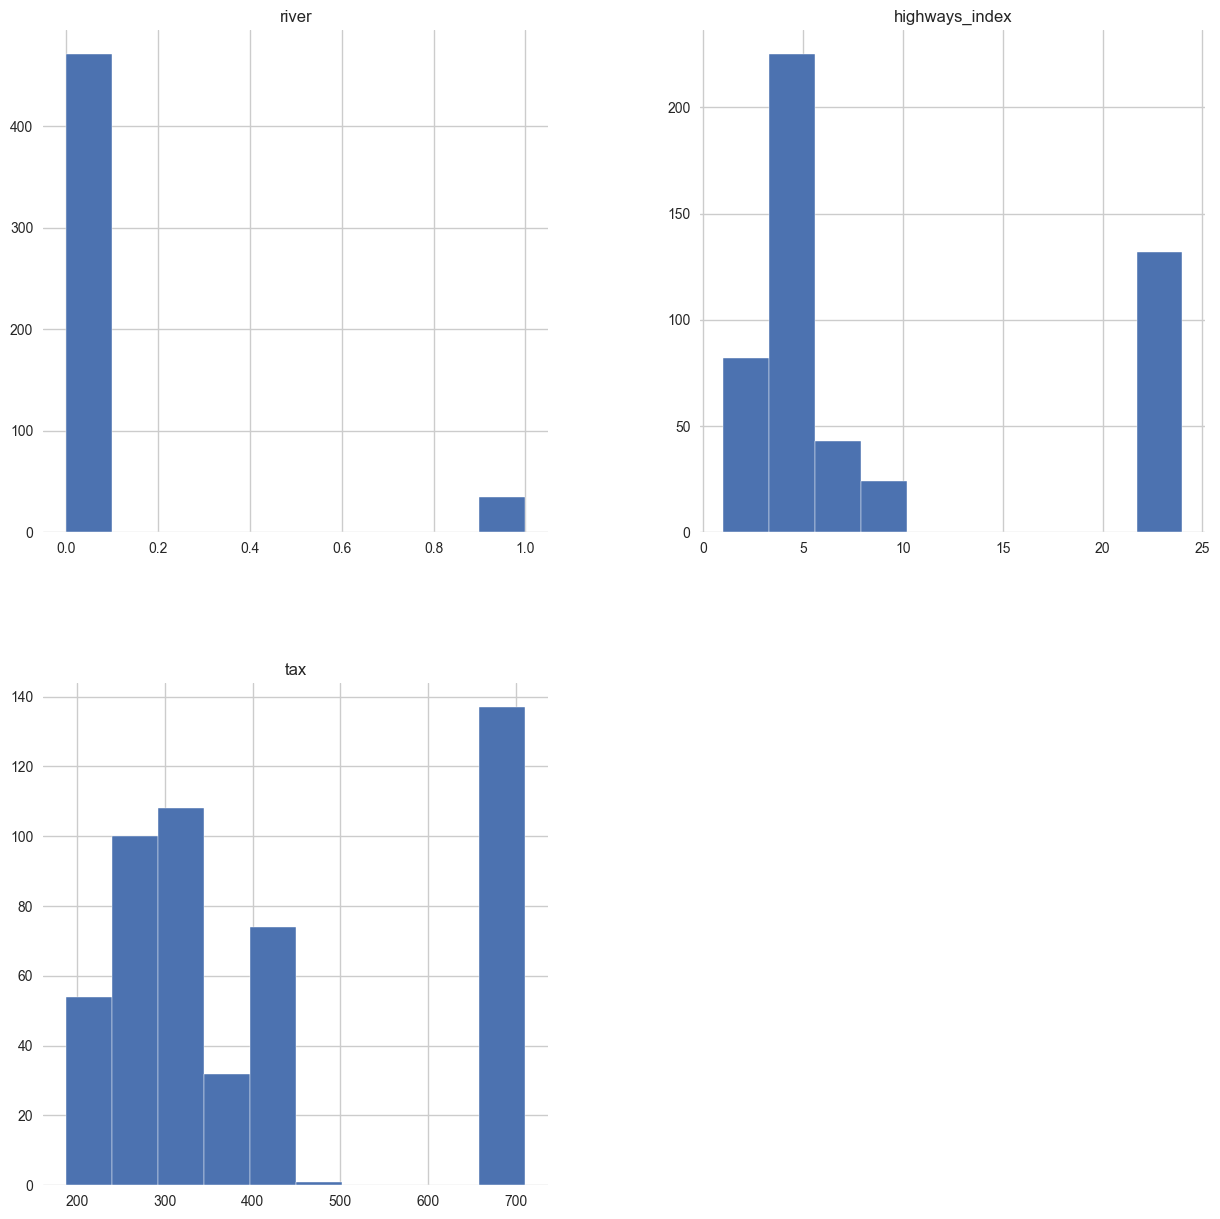

In [55]:
df.hist(figsize=(15, 15));

## Задание 3.4
0.0/4.0 points (graded)
1. Разбейте набор данных на обучающую и тестовую выборку в соотношении 70/30, при разбиении задайте параметр random_state = 13.

Какое получилось среднее значение медианных цен на обучающей выборке? Ответ округлите до двух знаков после точки-разделителя.

In [56]:
# Задание 3.4
# Преобразуем целевой столбец target в числовой формат (сейчас он object)
# Сначала посмотрим на несколько примеров значений
print("Примеры значений target (первые 15, включая уникальные):")
print(df['target'].head(15))
print(f"\nУникальные значения target (первые 20):")
print(df['target'].unique()[:20])
print(f"\nТип данных: {df['target'].dtype}")

# Сохраняем исходные значения для диагностики
target_original = df['target'].copy()

# Пробуем разные способы преобразования
# Способ 1: Заменяем запятые на точки (если есть)
df['target'] = df['target'].astype(str).str.replace(',', '.', regex=False)

# Способ 2: Убираем пробелы и другие символы
df['target'] = df['target'].str.strip()
df['target'] = df['target'].str.replace(' ', '', regex=False)

# Способ 3: Преобразуем в числовой формат
df['target'] = pd.to_numeric(df['target'], errors='coerce')

# Проверяем результат
print(f"\nПосле преобразования:")
print(f"Количество непустых значений: {df['target'].notna().sum()} из {len(df)}")
print(f"Количество пустых значений (NaN): {df['target'].isna().sum()}")

# Показываем примеры значений, которые не преобразовались
if df['target'].isna().sum() > 0:
    print(f"\nПримеры значений, которые не преобразовались (первые 10):")
    failed_values = target_original[df['target'].isna()].head(10)
    print(failed_values)

print(f"\nФинальная статистика по target:")
print(df['target'].describe())

# Разбиваем данные на обучающую и тестовую выборку 70/30 с random_state=13
from sklearn.model_selection import train_test_split

# Разделяем на признаки и целевую переменную
X = df.drop('target', axis=1)  # Все признаки кроме target
y = df['target']               # Целевая переменная (медианная стоимость домов)

# Разбиваем на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,           # 30% для теста
    random_state=13          # random_state = 13 (как указано в задании)
)

print(f"\n{'='*60}")
print("РАЗБИЕНИЕ ДАННЫХ")
print(f"{'='*60}")
print(f"Обучающая выборка: {len(X_train)} образцов ({len(X_train)/len(df):.1%})")
print(f"Тестовая выборка: {len(X_test)} образцов ({len(X_test)/len(df):.1%})")

# Вычисляем среднее значение медианных цен на обучающей выборке
mean_target_train = y_train.mean()

print(f"\n{'='*60}")
print("РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ")
print(f"{'='*60}")
print(f"Среднее значение медианных цен на обучающей выборке: {mean_target_train:.2f}")

print(f"\n✅ Ответ для задания:")
print(f"Среднее значение медианных цен на обучающей выборке: {mean_target_train:.2f}")


Примеры значений target (первые 15, включая уникальные):
0       24
1     21,6
2     34,7
3     33,4
4     36,2
5     28,7
6     22,9
7     27,1
8     16,5
9     18,9
10      15
11    18,9
12    21,7
13    20,4
14    18,2
Name: target, dtype: object

Уникальные значения target (первые 20):
['24' '21,6' '34,7' '33,4' '36,2' '28,7' '22,9' '27,1' '16,5' '18,9' '15'
 '21,7' '20,4' '18,2' '19,9' '23,1' '17,5' '20,2' '13,6' '19,6']

Тип данных: object

После преобразования:
Количество непустых значений: 506 из 506
Количество пустых значений (NaN): 0

Финальная статистика по target:
count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: target, dtype: float64

РАЗБИЕНИЕ ДАННЫХ
Обучающая выборка: 354 образцов (70.0%)
Тестовая выборка: 152 образцов (30.0%)

РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ
Среднее значение медианных цен на обучающей выборке: 22.77

✅ Ответ для задания:
Среднее значение медианных 

### 2. Обучите линейную регрессию с параметрами по умолчанию.

В качестве ответа введите ошибку MAE на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя.

In [57]:
# Задание: Обучить линейную регрессию и вычислить MAE на тестовой выборке
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Перед обучением нужно преобразовать все признаки в числовой формат
# Многие столбцы имеют тип object (строки с запятыми вместо точек)
print("Преобразование признаков в числовой формат...")

# Преобразуем все признаки, которые имеют тип object
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        # Заменяем запятые на точки и преобразуем в числа
        X_train[col] = X_train[col].astype(str).str.replace(',', '.', regex=False).str.strip()
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
        
        X_test[col] = X_test[col].astype(str).str.replace(',', '.', regex=False).str.strip()
        X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Проверяем, что все признаки теперь числовые
print(f"\nТипы данных признаков после преобразования:")
print(X_train.dtypes)
print(f"\nКоличество NaN в обучающей выборке: {X_train.isna().sum().sum()}")
print(f"Количество NaN в тестовой выборке: {X_test.isna().sum().sum()}")

# Заполняем NaN средними значениями (если есть)
if X_train.isna().sum().sum() > 0:
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

print("\n" + "="*60)
print("ОБУЧЕНИЕ ЛИНЕЙНОЙ РЕГРЕССИИ")
print("="*60)

# Обучаем линейную регрессию с параметрами по умолчанию
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_test_pred = lr_model.predict(X_test)

# Вычисляем MAE (Mean Absolute Error)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"MAE на тестовой выборке: {mae_test:.4f}")
print(f"\nДополнительная информация:")
print(f"R² (коэффициент детерминации): {lr_model.score(X_test, y_test):.4f}")

# Сравнение с базовой метрикой (среднее значение)
baseline_mae = mean_absolute_error(y_test, [y_train.mean()] * len(y_test))
print(f"MAE базовой модели (предсказание средним): {baseline_mae:.4f}")

print(f"\n{'='*60}")
print("РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ")
print(f"{'='*60}")
print(f"MAE на тестовой выборке: {mae_test:.2f}")

print(f"\n✅ Ответ для задания:")
print(f"MAE на тестовой выборке: {mae_test:.2f}")


Преобразование признаков в числовой формат...

Типы данных признаков после преобразования:
crim_rate         float64
zn                float64
business          float64
river               int64
nit_oxiden        float64
rooms             float64
age               float64
dist              float64
highways_index      int64
tax                 int64
pup_per_teaс      float64
lower             float64
dtype: object

Количество NaN в обучающей выборке: 0
Количество NaN в тестовой выборке: 0

ОБУЧЕНИЕ ЛИНЕЙНОЙ РЕГРЕССИИ
MAE на тестовой выборке: 3.7223

Дополнительная информация:
R² (коэффициент детерминации): 0.7036
MAE базовой модели (предсказание средним): 6.6596

РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ
MAE на тестовой выборке: 3.72

✅ Ответ для задания:
MAE на тестовой выборке: 3.72


### 3. Обучите решающее дерево с параметрами по умолчанию и аргументом random_state = 13.

Можно ли, опираясь на результаты, сделать вывод, что алгоритм переобучился?

In [58]:
# Обучение решающего дерева с параметрами по умолчанию и random_state=13
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("="*60)
print("ОБУЧЕНИЕ РЕШАЮЩЕГО ДЕРЕВА")
print("="*60)

# Обучаем решающее дерево с параметрами по умолчанию
dt_model = DecisionTreeRegressor(random_state=13)
dt_model.fit(X_train, y_train)

# Предсказания на обучающей и тестовой выборках
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Вычисляем метрики на обучающей выборке
mae_train = mean_absolute_error(y_train, y_train_pred_dt)
mse_train = mean_squared_error(y_train, y_train_pred_dt)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred_dt)

# Вычисляем метрики на тестовой выборке
mae_test_dt = mean_absolute_error(y_test, y_test_pred_dt)
mse_test = mean_squared_error(y_test, y_test_pred_dt)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred_dt)

print(f"\nМЕТРИКИ НА ОБУЧАЮЩЕЙ ВЫБОРКЕ:")
print(f"  MAE (Mean Absolute Error):     {mae_train:.4f}")
print(f"  RMSE (Root Mean Squared Error): {rmse_train:.4f}")
print(f"  R² (коэффициент детерминации):  {r2_train:.4f}")

print(f"\nМЕТРИКИ НА ТЕСТОВОЙ ВЫБОРКЕ:")
print(f"  MAE (Mean Absolute Error):     {mae_test_dt:.4f}")
print(f"  RMSE (Root Mean Squared Error): {rmse_test:.4f}")
print(f"  R² (коэффициент детерминации):  {r2_test:.4f}")

# Анализ переобучения
print(f"\n{'='*60}")
print("АНАЛИЗ ПЕРЕОБУЧЕНИЯ")
print(f"{'='*60}")

# Разница между метриками на train и test
mae_diff = mae_train - mae_test_dt
r2_diff = r2_train - r2_test

print(f"Разница MAE (train - test): {mae_diff:.4f}")
print(f"Разница R² (train - test):  {r2_diff:.4f}")

# Критерии переобучения:
# 1. R² на обучающей выборке близок к 1.0 (идеальное предсказание)
# 2. R² на тестовой выборке значительно ниже
# 3. MAE на обучающей выборке близок к 0
# 4. MAE на тестовой выборке значительно выше

is_overfitting = False
reasons = []

if r2_train > 0.99:
    is_overfitting = True
    reasons.append(f"R² на обучающей выборке очень высокий ({r2_train:.4f}), что указывает на почти идеальное предсказание")

if r2_diff > 0.2:
    is_overfitting = True
    reasons.append(f"Большая разница в R² между train и test ({r2_diff:.4f})")

if mae_train < 0.1:
    is_overfitting = True
    reasons.append(f"MAE на обучающей выборке очень низкий ({mae_train:.4f}), что указывает на запоминание данных")

if mae_test_dt > mae_train * 2:
    is_overfitting = True
    reasons.append(f"MAE на тестовой выборке значительно выше, чем на обучающей ({mae_test_dt:.4f} vs {mae_train:.4f})")

print(f"\n{'='*60}")
print("ВЫВОД О ПЕРЕОБУЧЕНИИ")
print(f"{'='*60}")

if is_overfitting:
    print("✅ ДА, алгоритм ПЕРЕОБУЧИЛСЯ (overfitting)")
    print("\nПризнаки переобучения:")
    for i, reason in enumerate(reasons, 1):
        print(f"  {i}. {reason}")
    print("\nОбъяснение:")
    print("  Решающее дерево с параметрами по умолчанию создает очень глубокое дерево,")
    print("  которое запоминает обучающие данные, но плохо обобщается на новые данные.")
else:
    print("❌ НЕТ, алгоритм НЕ переобучился")
    print("  Метрики на обучающей и тестовой выборках близки,")
    print("  что указывает на хорошую способность к обобщению.")

print(f"\n{'='*60}")
print("СРАВНЕНИЕ С ЛИНЕЙНОЙ РЕГРЕССИЕЙ")
print(f"{'='*60}")
print(f"Линейная регрессия - MAE (test): {mae_test:.4f}")
print(f"Решающее дерево    - MAE (test): {mae_test_dt:.4f}")
print(f"Разница: {mae_test_dt - mae_test:+.4f}")


ОБУЧЕНИЕ РЕШАЮЩЕГО ДЕРЕВА

МЕТРИКИ НА ОБУЧАЮЩЕЙ ВЫБОРКЕ:
  MAE (Mean Absolute Error):     0.0000
  RMSE (Root Mean Squared Error): 0.0000
  R² (коэффициент детерминации):  1.0000

МЕТРИКИ НА ТЕСТОВОЙ ВЫБОРКЕ:
  MAE (Mean Absolute Error):     2.8388
  RMSE (Root Mean Squared Error): 4.3674
  R² (коэффициент детерминации):  0.7691

АНАЛИЗ ПЕРЕОБУЧЕНИЯ
Разница MAE (train - test): -2.8388
Разница R² (train - test):  0.2309

ВЫВОД О ПЕРЕОБУЧЕНИИ
✅ ДА, алгоритм ПЕРЕОБУЧИЛСЯ (overfitting)

Признаки переобучения:
  1. R² на обучающей выборке очень высокий (1.0000), что указывает на почти идеальное предсказание
  2. Большая разница в R² между train и test (0.2309)
  3. MAE на обучающей выборке очень низкий (0.0000), что указывает на запоминание данных
  4. MAE на тестовой выборке значительно выше, чем на обучающей (2.8388 vs 0.0000)

Объяснение:
  Решающее дерево с параметрами по умолчанию создает очень глубокое дерево,
  которое запоминает обучающие данные, но плохо обобщается на новые данные.

### 4. Обучите четыре случайных леса с числом деревьев 3, 10, 100, 500 и параметром random_state = 13.

В качестве ответа введите наименьшую полученную ошибку MAE на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя.
2.24

In [59]:
# Обучение четырех случайных лесов с разным количеством деревьев
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd

print("="*60)
print("ОБУЧЕНИЕ СЛУЧАЙНЫХ ЛЕСОВ")
print("="*60)

# Количество деревьев для каждого леса
n_trees_list = [3, 10, 100, 500]
random_state = 13

# Словарь для хранения результатов
results = {}

# Обучаем каждый случайный лес
for n_trees in n_trees_list:
    print(f"\n{'='*60}")
    print(f"Случайный лес с {n_trees} деревьями")
    print(f"{'='*60}")
    
    # Создаем и обучаем модель
    rf_model = RandomForestRegressor(
        n_estimators=n_trees,
        random_state=random_state,
        n_jobs=-1  # Использовать все доступные ядра
    )
    
    print(f"Обучаю модель...")
    rf_model.fit(X_train, y_train)
    
    # Предсказания на обучающей и тестовой выборках
    y_train_pred_rf = rf_model.predict(X_train)
    y_test_pred_rf = rf_model.predict(X_test)
    
    # Вычисляем метрики
    mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
    mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
    
    # Сохраняем результаты
    results[n_trees] = {
        'mae_train': mae_train_rf,
        'mae_test': mae_test_rf,
        'model': rf_model
    }
    
    print(f"MAE на обучающей выборке: {mae_train_rf:.4f}")
    print(f"MAE на тестовой выборке:  {mae_test_rf:.4f}")

# Создаем таблицу результатов
print(f"\n{'='*60}")
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print(f"{'='*60}")

results_df = pd.DataFrame({
    'Количество деревьев': n_trees_list,
    'MAE (train)': [results[n]['mae_train'] for n in n_trees_list],
    'MAE (test)': [results[n]['mae_test'] for n in n_trees_list]
})

print(results_df.to_string(index=False))

# Находим наименьшую MAE на тестовой выборке
min_mae_test = min([results[n]['mae_test'] for n in n_trees_list])
best_n_trees = min([n for n in n_trees_list if results[n]['mae_test'] == min_mae_test])

print(f"\n{'='*60}")
print("РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ")
print(f"{'='*60}")
print(f"Наименьшая MAE на тестовой выборке: {min_mae_test:.4f}")
print(f"Достигнута при количестве деревьев: {best_n_trees}")

print(f"\n✅ Ответ для задания:")
print(f"Наименьшая MAE на тестовой выборке: {min_mae_test:.2f}")

# Дополнительная визуализация
print(f"\n{'='*60}")
print("АНАЛИЗ РЕЗУЛЬТАТОВ")
print(f"{'='*60}")
print("Зависимость MAE от количества деревьев:")
for n_trees in n_trees_list:
    print(f"  {n_trees:3d} деревьев: MAE (test) = {results[n_trees]['mae_test']:.4f}")


ОБУЧЕНИЕ СЛУЧАЙНЫХ ЛЕСОВ

Случайный лес с 3 деревьями
Обучаю модель...
MAE на обучающей выборке: 1.0775
MAE на тестовой выборке:  2.6904

Случайный лес с 10 деревьями
Обучаю модель...
MAE на обучающей выборке: 0.9748
MAE на тестовой выборке:  2.3800

Случайный лес с 100 деревьями
Обучаю модель...
MAE на обучающей выборке: 0.8636
MAE на тестовой выборке:  2.2532

Случайный лес с 500 деревьями
Обучаю модель...
MAE на обучающей выборке: 0.8540
MAE на тестовой выборке:  2.2377

СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
 Количество деревьев  MAE (train)  MAE (test)
                   3     1.077495    2.690351
                  10     0.974774    2.380000
                 100     0.863562    2.253184
                 500     0.853956    2.237738

РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ
Наименьшая MAE на тестовой выборке: 2.2377
Достигнута при количестве деревьев: 500

✅ Ответ для задания:
Наименьшая MAE на тестовой выборке: 2.24

АНАЛИЗ РЕЗУЛЬТАТОВ
Зависимость MAE от количества деревьев:
    3 деревьев: MAE (test) = 2.690

2.2377

# 4. Случайный лес. Практика

Данные содержат 23 признака и 145 460 наблюдений. Из этих 23 признаков шесть — категориальные, в одном записана дата, а остальные являются непрерывными числовыми данными.

Примеры числовых признаков: температура, скорость ветра, влажность, облачность, атмосферное давление в разное время суток, количество осадков, испарение, количество часов с солнечной погодой.
Примеры категориальных признаков: местоположение, направление ветра в разное время суток, наличие дождя сегодня или завтра.
Целевой переменной является столбец RainTomorrow. Значение этой переменной мы и будем пытаться предсказать.

Подробная расшифровка всех признаков
Date — дата, в которую зафиксировано наблюдение;
Location — местонахождение метеорологической станции;
MinTemp — минимальная температура (℃);
MaxTemp — максимальная температура (℃);
Rainfall — количество осадков (дождь) за сутки (мм);
Evaporation — количество испарений до 9 утра (мм);
Sunshine — количество часов в сутках, когда светило солнце;
WindGustDir — направление самого сильного порыва ветра за последние 24 часа;
WindGustSpeed — скорость самого сильного порыва ветра за последние 24 часа;
WindDir9am — направление ветра в 9 утра;
WindDir3pm — направление ветра в 3 часа дня;
WindSpeed9am — скорость ветра в 9 часов утра;
WindSpeed3pm — скорость ветра в 3 часа дня;
Humidity9am — влажность в 9 утра;
Humidity3pm — влажность в 3 часа дня;
Pressure9am — атмосферное давление в 9 утра;
Pressure3pm — атмосферное давление в 3 часа дня;
Cloud9am — часть неба, закрытая облаками, в 9 утра;
Cloud3pm — часть неба, закрытая облаками, в 3 часа дня;
Temp9am — температура в 9 утра;
Temp3pm — температура в 3 часа дня;
RainToday — наличие дождя в этот день;
RainTomorrow — наличие дождя на следующий день.



In [68]:
weatherAUS_df = pd.read_csv('data/weatherAUS.csv', sep=',')

print(f"Размер датасета: {weatherAUS_df.shape}")
print(f"\nПервые строки:")
weatherAUS_df.head()

Размер датасета: (145460, 23)

Первые строки:


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Задание 4.1
1 point possible (graded)
Сколько суммарно пропусков в данных?


In [69]:
# Задание 4.1: Подсчет суммарного количества пропусков в данных
print("="*60)
print("АНАЛИЗ ПРОПУСКОВ В ДАННЫХ")
print("="*60)

# Подсчет пропусков по каждому столбцу
missing_by_column = weatherAUS_df.isnull().sum()

print("\nПропуски по столбцам:")
print(missing_by_column[missing_by_column > 0].sort_values(ascending=False))

# Суммарное количество пропусков во всем датасете
total_missing = weatherAUS_df.isnull().sum().sum()

print(f"\n{'='*60}")
print("РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ")
print(f"{'='*60}")
print(f"Суммарное количество пропусков: {total_missing}")

# Дополнительная информация
print(f"\nДополнительная статистика:")
print(f"  Всего ячеек в датасете: {weatherAUS_df.shape[0] * weatherAUS_df.shape[1]:,}")
print(f"  Пропущенных значений: {total_missing:,}")
print(f"  Процент пропусков: {total_missing / (weatherAUS_df.shape[0] * weatherAUS_df.shape[1]) * 100:.2f}%")
print(f"  Столбцов с пропусками: {(missing_by_column > 0).sum()} из {len(weatherAUS_df.columns)}")

print(f"\n✅ Ответ для задания:")
print(f"Суммарное количество пропусков: {total_missing}")


АНАЛИЗ ПРОПУСКОВ В ДАННЫХ

Пропуски по столбцам:
Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
dtype: int64

РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ
Суммарное количество пропусков: 343248

Дополнительная статистика:
  Всего ячеек в датасете: 3,345,580
  Пропущенных значений: 343,248
  Процент пропусков: 10.26%
  Столбцов с пропусками: 21 из 23

✅ Ответ для задания:
Суммарное количество пропусков: 343248


## Задание 4.2
1 point possible (graded)
В некоторых признаках пропусков более 40 % — удалите такие признаки. Сколько их было?

In [70]:
# Задание 4.2: Удаление признаков с пропусками более 40%
print("="*60)
print("АНАЛИЗ ПРИЗНАКОВ С ПРОПУСКАМИ БОЛЕЕ 40%")
print("="*60)

# Вычисляем процент пропусков для каждого признака
total_rows = len(weatherAUS_df)
missing_percent = (weatherAUS_df.isnull().sum() / total_rows * 100).sort_values(ascending=False)

print("\nПроцент пропусков по признакам (отсортировано по убыванию):")
print(missing_percent[missing_percent > 0])

# Находим признаки с пропусками более 40%
threshold = 40.0
columns_to_drop = missing_percent[missing_percent > threshold].index.tolist()

print(f"\n{'='*60}")
print(f"ПРИЗНАКИ С ПРОПУСКАМИ БОЛЕЕ {threshold}%")
print(f"{'='*60}")

if len(columns_to_drop) > 0:
    print(f"\nНайдено признаков с пропусками > {threshold}%: {len(columns_to_drop)}")
    print("\nСписок признаков для удаления:")
    for i, col in enumerate(columns_to_drop, 1):
        missing_count = weatherAUS_df[col].isnull().sum()
        missing_pct = missing_percent[col]
        print(f"  {i}. {col}: {missing_count:,} пропусков ({missing_pct:.2f}%)")
    
    # Удаляем признаки
    print(f"\nУдаляю {len(columns_to_drop)} признаков...")
    weatherAUS_df_cleaned = weatherAUS_df.drop(columns=columns_to_drop)
    
    print(f"\nРазмер датасета до удаления: {weatherAUS_df.shape}")
    print(f"Размер датасета после удаления: {weatherAUS_df_cleaned.shape}")
    print(f"Удалено столбцов: {weatherAUS_df.shape[1] - weatherAUS_df_cleaned.shape[1]}")
    
    # Обновляем основной датасет
    weatherAUS_df = weatherAUS_df_cleaned.copy()
    
else:
    print(f"\nПризнаков с пропусками > {threshold}% не найдено.")
    weatherAUS_df_cleaned = weatherAUS_df.copy()

print(f"\n{'='*60}")
print("РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ")
print(f"{'='*60}")
print(f"Количество удаленных признаков: {len(columns_to_drop)}")

print(f"\n✅ Ответ для задания:")
print(f"Количество признаков с пропусками более 40%: {len(columns_to_drop)}")


АНАЛИЗ ПРИЗНАКОВ С ПРОПУСКАМИ БОЛЕЕ 40%

Процент пропусков по признакам (отсортировано по убыванию):
Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
dtype: float64

ПРИЗНАКИ С ПРОПУСКАМИ БОЛЕЕ 40.0%

Найдено признаков с пропусками > 40.0%: 3

Список признаков для удаления:
  1. Sunshine: 69,835 пропусков (48.01%)
  2. Evaporation: 62,790 пропусков (43.17%)
  3. Cloud3pm: 59,358 пропусков (40.81%)

Удаляю 3 признаков...

Размер датасета до удаления: (145460, 23)
Размер датасета

## Задание 4.3
1 point possible (graded)
Теперь обработаем признаки RainToday и RainTomorrow таким образом, чтобы вместо yes было значение 1, а вместо no — значение 0. Обратите внимание на то, что в признаках RainToday и RainTomorrow присутствуют пропуски, и их трогать не нужно, они должны остаться пропусками. Поэтому обрабатывайте столбцы таким образом, чтобы не видоизменить пропущенные значения.

Вычислите среднее арифметическое для преобразованного признака RainToday и запишите его в ответ, предварительно округлив до двух знаков после точки-разделителя.

In [71]:
# Задание 4.3: Преобразование признаков RainToday и RainTomorrow
# yes -> 1, no -> 0, пропуски остаются пропусками
print("="*60)
print("ПРЕОБРАЗОВАНИЕ ПРИЗНАКОВ RainToday И RainTomorrow")
print("="*60)

# Проверяем текущие значения перед преобразованием
print("\nТекущие значения RainToday:")
print(weatherAUS_df['RainToday'].value_counts(dropna=False))
print(f"\nКоличество пропусков в RainToday: {weatherAUS_df['RainToday'].isnull().sum()}")

print("\nТекущие значения RainTomorrow:")
print(weatherAUS_df['RainTomorrow'].value_counts(dropna=False))
print(f"\nКоличество пропусков в RainTomorrow: {weatherAUS_df['RainTomorrow'].isnull().sum()}")

# Преобразуем: yes -> 1, no -> 0, пропуски остаются пропусками
# Используем map с словарем, чтобы пропуски не изменялись
weatherAUS_df['RainToday'] = weatherAUS_df['RainToday'].map({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0})
weatherAUS_df['RainTomorrow'] = weatherAUS_df['RainTomorrow'].map({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0})

# Проверяем результат преобразования
print(f"\n{'='*60}")
print("РЕЗУЛЬТАТ ПРЕОБРАЗОВАНИЯ")
print(f"{'='*60}")

print("\nЗначения RainToday после преобразования:")
print(weatherAUS_df['RainToday'].value_counts(dropna=False))
print(f"Тип данных: {weatherAUS_df['RainToday'].dtype}")

print("\nЗначения RainTomorrow после преобразования:")
print(weatherAUS_df['RainTomorrow'].value_counts(dropna=False))
print(f"Тип данных: {weatherAUS_df['RainTomorrow'].dtype}")

# Проверяем, что пропуски сохранились
print(f"\nПропуски в RainToday после преобразования: {weatherAUS_df['RainToday'].isnull().sum()}")
print(f"Пропуски в RainTomorrow после преобразования: {weatherAUS_df['RainTomorrow'].isnull().sum()}")

# Вычисляем среднее арифметическое для RainToday
mean_raintoday = weatherAUS_df['RainToday'].mean()

print(f"\n{'='*60}")
print("РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ")
print(f"{'='*60}")
print(f"Среднее арифметическое для RainToday: {mean_raintoday:.4f}")
print(f"Среднее арифметическое для RainToday (округлено до 2 знаков): {mean_raintoday:.2f}")

print(f"\n✅ Ответ для задания:")
print(f"Среднее арифметическое для RainToday: {mean_raintoday:.2f}")


ПРЕОБРАЗОВАНИЕ ПРИЗНАКОВ RainToday И RainTomorrow

Текущие значения RainToday:
RainToday
No     110319
Yes     31880
NaN      3261
Name: count, dtype: int64

Количество пропусков в RainToday: 3261

Текущие значения RainTomorrow:
RainTomorrow
No     110316
Yes     31877
NaN      3267
Name: count, dtype: int64

Количество пропусков в RainTomorrow: 3267

РЕЗУЛЬТАТ ПРЕОБРАЗОВАНИЯ

Значения RainToday после преобразования:
RainToday
0.0    110319
1.0     31880
NaN      3261
Name: count, dtype: int64
Тип данных: float64

Значения RainTomorrow после преобразования:
RainTomorrow
0.0    110316
1.0     31877
NaN      3267
Name: count, dtype: int64
Тип данных: float64

Пропуски в RainToday после преобразования: 3261
Пропуски в RainTomorrow после преобразования: 3267

РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ
Среднее арифметическое для RainToday: 0.2242
Среднее арифметическое для RainToday (округлено до 2 знаков): 0.22

✅ Ответ для задания:
Среднее арифметическое для RainToday: 0.22


## Задание 4.4
1 point possible (graded)
Обработайте признак Date таким образом, чтобы выделить в отдельный признак Month (номер месяца). Изначальный признак Date удалите. Определите, какой месяц имеет самую большую часть дождливых дней относительно всех дней месяца. В качестве ответа введите порядковый номер месяца.

In [72]:
# Задание 4.4: Обработка признака Date и определение месяца с наибольшей долей дождливых дней
print("="*60)
print("ОБРАБОТКА ПРИЗНАКА Date")
print("="*60)

# Проверяем формат Date перед преобразованием
print("\nПервые значения Date:")
print(weatherAUS_df['Date'].head(10))
print(f"\nТип данных Date: {weatherAUS_df['Date'].dtype}")

# Преобразуем Date в datetime и извлекаем номер месяца
weatherAUS_df['Date'] = pd.to_datetime(weatherAUS_df['Date'])
weatherAUS_df['Month'] = weatherAUS_df['Date'].dt.month

# Проверяем результат
print(f"\nПосле преобразования:")
print(f"Первые значения Month:")
print(weatherAUS_df['Month'].head(10))
print(f"\nРаспределение по месяцам:")
print(weatherAUS_df['Month'].value_counts().sort_index())

# Удаляем исходный признак Date
print(f"\nУдаляю признак Date...")
weatherAUS_df = weatherAUS_df.drop('Date', axis=1)
print(f"Размер датасета после удаления Date: {weatherAUS_df.shape}")

# Определяем месяц с наибольшей долей дождливых дней
print(f"\n{'='*60}")
print("АНАЛИЗ ДОЛЕЙ ДОЖДЛИВЫХ ДНЕЙ ПО МЕСЯЦАМ")
print(f"{'='*60}")

# Группируем по месяцам и вычисляем долю дождливых дней
# Дождливые дни - это где RainToday == 1
rain_by_month = weatherAUS_df.groupby('Month').agg({
    'RainToday': [
        ('total_days', 'count'),           # Всего дней в месяце
        ('rainy_days', lambda x: (x == 1).sum()),  # Количество дождливых дней
        ('rainy_ratio', lambda x: (x == 1).mean())  # Доля дождливых дней
    ]
})

# Упрощаем структуру DataFrame
rain_by_month.columns = ['total_days', 'rainy_days', 'rainy_ratio']
rain_by_month = rain_by_month.sort_values('rainy_ratio', ascending=False)

print("\nДоля дождливых дней по месяцам (отсортировано по убыванию):")
print(rain_by_month)

# Находим месяц с наибольшей долей дождливых дней
best_month = rain_by_month.index[0]
best_ratio = rain_by_month.iloc[0]['rainy_ratio']
best_rainy_days = rain_by_month.iloc[0]['rainy_days']
best_total_days = rain_by_month.iloc[0]['total_days']

print(f"\n{'='*60}")
print("РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ")
print(f"{'='*60}")
print(f"Месяц с наибольшей долей дождливых дней: {best_month}")
print(f"  Доля дождливых дней: {best_ratio:.4f} ({best_ratio*100:.2f}%)")
print(f"  Дождливых дней: {best_rainy_days:.0f} из {best_total_days:.0f}")

print(f"\n✅ Ответ для задания:")
print(f"Порядковый номер месяца с наибольшей долей дождливых дней: {best_month}")


ОБРАБОТКА ПРИЗНАКА Date

Первые значения Date:
0    2008-12-01
1    2008-12-02
2    2008-12-03
3    2008-12-04
4    2008-12-05
5    2008-12-06
6    2008-12-07
7    2008-12-08
8    2008-12-09
9    2008-12-10
Name: Date, dtype: object

Тип данных Date: object

После преобразования:
Первые значения Month:
0    12
1    12
2    12
3    12
4    12
5    12
6    12
7    12
8    12
9    12
Name: Month, dtype: int32

Распределение по месяцам:
Month
1     13236
2     10793
3     13361
4     11550
5     13353
6     12684
7     12025
8     12028
9     11640
10    12028
11    11669
12    11093
Name: count, dtype: int64

Удаляю признак Date...
Размер датасета после удаления Date: (145460, 20)

АНАЛИЗ ДОЛЕЙ ДОЖДЛИВЫХ ДНЕЙ ПО МЕСЯЦАМ

Доля дождливых дней по месяцам (отсортировано по убыванию):
       total_days  rainy_days  rainy_ratio
Month                                     
7           11779        3189     0.265198
6           12392        3267     0.257569
8           11763        2978     0.2475

## Задание 4.5
1 point possible (graded)
Обработайте оставшиеся категориальные признаки. С помощью метода get_dummies с настройками по умолчанию создайте dummy-переменные для всех категориальных признаков (их пять), которые есть в данных на этот момент.

Кодировку признаков важно выполнить именно в следующем порядке: categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']. Это необходимо для того, чтобы ваши дальнейшие ответы сходились с нашим решением, так как алгоритм случайного леса, который мы будем использовать в дальнейшем, чувствителен к порядку столбцов. Аргумент categoricals передаётся в функцию pd.get_dummies() с использованием ключевого слова columns, а именно columns=categoricals.

Сколько теперь признаков в данных, если считать целевую переменную?

In [73]:
# Задание 4.5: Обработка категориальных признаков с помощью get_dummies
print("="*60)
print("ОБРАБОТКА КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")
print("="*60)

# Проверяем текущее состояние данных
print(f"\nРазмер датасета до обработки: {weatherAUS_df.shape}")
print(f"Количество столбцов: {len(weatherAUS_df.columns)}")

# Проверяем наличие категориальных признаков
print(f"\nКатегориальные признаки в данных:")
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
for col in categoricals:
    if col in weatherAUS_df.columns:
        print(f"  ✓ {col}: {weatherAUS_df[col].nunique()} уникальных значений")
    else:
        print(f"  ✗ {col}: НЕ НАЙДЕН")

# Применяем get_dummies в указанном порядке
print(f"\nПрименяю pd.get_dummies() с порядком: {categoricals}")
weatherAUS_df = pd.get_dummies(weatherAUS_df, columns=categoricals)

# Проверяем результат
print(f"\nРазмер датасета после обработки: {weatherAUS_df.shape}")
print(f"Количество столбцов: {len(weatherAUS_df.columns)}")

# Подсчитываем общее количество признаков (включая целевую переменную RainTomorrow)
total_features = len(weatherAUS_df.columns)

print(f"\n{'='*60}")
print("РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ")
print(f"{'='*60}")
print(f"Общее количество признаков (включая целевую переменную RainTomorrow): {total_features}")

# Дополнительная информация
print(f"\nДополнительная информация:")
print(f"  Столбцов в датасете: {len(weatherAUS_df.columns)}")
print(f"  Строк в датасете: {len(weatherAUS_df)}")
print(f"  Целевая переменная: RainTomorrow")

# Показываем первые несколько новых столбцов (dummy-переменные)
print(f"\nПримеры созданных dummy-переменных (первые 10 столбцов):")
print(weatherAUS_df.columns[:10].tolist())

print(f"\n✅ Ответ для задания:")
print(f"Общее количество признаков (включая целевую переменную): {total_features}")


ОБРАБОТКА КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ

Размер датасета до обработки: (145460, 20)
Количество столбцов: 20

Категориальные признаки в данных:
  ✓ Month: 12 уникальных значений
  ✓ Location: 49 уникальных значений
  ✓ WindGustDir: 16 уникальных значений
  ✓ WindDir9am: 16 уникальных значений
  ✓ WindDir3pm: 16 уникальных значений

Применяю pd.get_dummies() с порядком: ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

Размер датасета после обработки: (145460, 124)
Количество столбцов: 124

РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ
Общее количество признаков (включая целевую переменную RainTomorrow): 124

Дополнительная информация:
  Столбцов в датасете: 124
  Строк в датасете: 145460
  Целевая переменная: RainTomorrow

Примеры созданных dummy-переменных (первые 10 столбцов):
['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']

✅ Ответ для задания:
Общее количество признаков (включая целевую переменную): 1

## Задание 4.6
1 point possible (graded)
Осталось совсем немного. Удалите все строки, где есть пропуски. Далее разбейте данные на обучающую и тестовую выборки в соотношении 70/30, в качестве значения параметра random_state возьмите число 31.

Каково среднее значение целевой переменной на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.

In [74]:
# Задание 4.6: Удаление строк с пропусками и разбиение на train/test
print("="*60)
print("УДАЛЕНИЕ СТРОК С ПРОПУСКАМИ")
print("="*60)

# Проверяем количество пропусков перед удалением
total_missing_before = weatherAUS_df.isnull().sum().sum()
rows_before = len(weatherAUS_df)
print(f"Размер датасета до удаления: {weatherAUS_df.shape}")
print(f"Суммарное количество пропусков: {total_missing_before}")

# Удаляем все строки с пропусками
weatherAUS_df_clean = weatherAUS_df.dropna()

# Проверяем результат
rows_after = len(weatherAUS_df_clean)
rows_removed = rows_before - rows_after
total_missing_after = weatherAUS_df_clean.isnull().sum().sum()

print(f"\nРазмер датасета после удаления: {weatherAUS_df_clean.shape}")
print(f"Удалено строк: {rows_removed} ({rows_removed/rows_before*100:.2f}%)")
print(f"Осталось строк: {rows_after}")
print(f"Пропусков после удаления: {total_missing_after}")

# Обновляем основной датасет
weatherAUS_df = weatherAUS_df_clean.copy()

# Разбиваем данные на обучающую и тестовую выборки
print(f"\n{'='*60}")
print("РАЗБИЕНИЕ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ")
print(f"{'='*60}")

from sklearn.model_selection import train_test_split

# Разделяем на признаки и целевую переменную
# Целевая переменная - RainTomorrow
X = weatherAUS_df.drop('RainTomorrow', axis=1)
y = weatherAUS_df['RainTomorrow']

# Разбиваем на train/test 70/30 с random_state=31
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,        # 30% для теста
    random_state=31       # random_state = 31 (как указано в задании)
)

print(f"Обучающая выборка: {len(X_train)} образцов ({len(X_train)/len(weatherAUS_df):.1%})")
print(f"Тестовая выборка: {len(X_test)} образцов ({len(X_test)/len(weatherAUS_df):.1%})")

# Вычисляем среднее значение целевой переменной на тестовой выборке
mean_target_test = y_test.mean()

print(f"\n{'='*60}")
print("РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ")
print(f"{'='*60}")
print(f"Среднее значение целевой переменной (RainTomorrow) на тестовой выборке: {mean_target_test:.4f}")
print(f"Среднее значение (округлено до 2 знаков): {mean_target_test:.2f}")

# Дополнительная информация
print(f"\nДополнительная информация:")
print(f"  Распределение целевой переменной на тестовой выборке:")
print(y_test.value_counts().sort_index())
print(f"  Доля дождливых дней (RainTomorrow=1): {mean_target_test:.4f} ({mean_target_test*100:.2f}%)")
print(f"  Доля недождливых дней (RainTomorrow=0): {(1-mean_target_test):.4f} ({(1-mean_target_test)*100:.2f}%)")

print(f"\n✅ Ответ для задания:")
print(f"Среднее значение целевой переменной на тестовой выборке: {mean_target_test:.2f}")


УДАЛЕНИЕ СТРОК С ПРОПУСКАМИ
Размер датасета до удаления: (145460, 124)
Суммарное количество пропусков: 126145

Размер датасета после удаления: (78257, 124)
Удалено строк: 67203 (46.20%)
Осталось строк: 78257
Пропусков после удаления: 0

РАЗБИЕНИЕ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ
Обучающая выборка: 54779 образцов (70.0%)
Тестовая выборка: 23478 образцов (30.0%)

РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ
Среднее значение целевой переменной (RainTomorrow) на тестовой выборке: 0.2277
Среднее значение (округлено до 2 знаков): 0.23

Дополнительная информация:
  Распределение целевой переменной на тестовой выборке:
RainTomorrow
0.0    18132
1.0     5346
Name: count, dtype: int64
  Доля дождливых дней (RainTomorrow=1): 0.2277 (22.77%)
  Доля недождливых дней (RainTomorrow=0): 0.7723 (77.23%)

✅ Ответ для задания:
Среднее значение целевой переменной на тестовой выборке: 0.23


## Задание 4.7
1 point possible (graded)
Теперь давайте вспомним про бутстреп. Он не понадобится нам для решения этой задачи, но будет полезно реализовать его «вручную».

Сделайте оценку стандартного отклонения для среднего значения минимальной температуры для обучающей выборки (то есть для среднего значения по признаку MinTemp). Для этого сгенерируйте 1000 случайных выборок из наших данных — каждая из них должна быть такого же объёма, как и обучающая выборка. Для генерации выборки используйте np.random.randint(): сгенерируйте необходимое количество индексов и по ним извлеките соответствующие элементы выборки. Случайность фиксируйте с помощью np.random.seed(31).

Для каждой выборки вычислите среднее значение, а после найдите стандартное отклонение для этих значений. Ответ округлите до двух знаков после точки-разделителя.

In [75]:
# Задание 4.7: Бутстреп-оценка стандартного отклонения для среднего значения MinTemp
print("="*60)
print("БУТСТРЕП-ОЦЕНКА СТАНДАРТНОГО ОТКЛОНЕНИЯ")
print("="*60)

# Проверяем наличие признака MinTemp в обучающей выборке
if 'MinTemp' not in X_train.columns:
    print("⚠️  Признак MinTemp не найден в обучающей выборке.")
    print("Доступные признаки:")
    print(X_train.columns.tolist()[:10])
else:
    # Извлекаем MinTemp из обучающей выборки
    min_temp_train = X_train['MinTemp'].values
    n_samples = len(min_temp_train)
    
    print(f"Размер обучающей выборки: {n_samples}")
    print(f"Среднее значение MinTemp на обучающей выборке: {min_temp_train.mean():.4f}")
    print(f"Стандартное отклонение MinTemp на обучающей выборке: {min_temp_train.std():.4f}")
    
    # Фиксируем случайность
    np.random.seed(31)
    
    # Количество бутстреп-выборок
    n_bootstrap = 1000
    
    # Список для хранения средних значений каждой бутстреп-выборки
    bootstrap_means = []
    
    print(f"\nГенерирую {n_bootstrap} бутстреп-выборок...")
    
    for i in range(n_bootstrap):
        # Генерируем случайные индексы с возвращением (bootstrap)
        # Каждая выборка такого же размера, как обучающая выборка
        bootstrap_indices = np.random.randint(0, n_samples, size=n_samples)
        
        # Извлекаем элементы по индексам
        bootstrap_sample = min_temp_train[bootstrap_indices]
        
        # Вычисляем среднее значение для этой выборки
        bootstrap_mean = bootstrap_sample.mean()
        bootstrap_means.append(bootstrap_mean)
        
        # Показываем прогресс каждые 100 итераций
        if (i + 1) % 100 == 0:
            print(f"  Обработано {i + 1}/{n_bootstrap} выборок...")
    
    # Преобразуем в numpy array для удобства вычислений
    bootstrap_means = np.array(bootstrap_means)
    
    # Вычисляем стандартное отклонение средних значений
    bootstrap_std = bootstrap_means.std()
    
    print(f"\n{'='*60}")
    print("РЕЗУЛЬТАТЫ БУТСТРЕП-ОЦЕНКИ")
    print(f"{'='*60}")
    print(f"Количество бутстреп-выборок: {n_bootstrap}")
    print(f"Среднее значение средних (из бутстреп): {bootstrap_means.mean():.4f}")
    print(f"Стандартное отклонение средних (бутстреп-оценка): {bootstrap_std:.4f}")
    print(f"Минимальное среднее: {bootstrap_means.min():.4f}")
    print(f"Максимальное среднее: {bootstrap_means.max():.4f}")
    
    print(f"\n{'='*60}")
    print("РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ")
    print(f"{'='*60}")
    print(f"Стандартное отклонение для среднего значения MinTemp (бутстреп-оценка): {bootstrap_std:.4f}")
    print(f"Округлено до 2 знаков: {bootstrap_std:.2f}")
    
    print(f"\n✅ Ответ для задания:")
    print(f"Стандартное отклонение (бутстреп-оценка): {bootstrap_std:.2f}")


БУТСТРЕП-ОЦЕНКА СТАНДАРТНОГО ОТКЛОНЕНИЯ
Размер обучающей выборки: 54779
Среднее значение MinTemp на обучающей выборке: 12.9228
Стандартное отклонение MinTemp на обучающей выборке: 6.5059

Генерирую 1000 бутстреп-выборок...
  Обработано 100/1000 выборок...
  Обработано 200/1000 выборок...
  Обработано 300/1000 выборок...
  Обработано 400/1000 выборок...
  Обработано 500/1000 выборок...
  Обработано 600/1000 выборок...
  Обработано 700/1000 выборок...
  Обработано 800/1000 выборок...
  Обработано 900/1000 выборок...
  Обработано 1000/1000 выборок...

РЕЗУЛЬТАТЫ БУТСТРЕП-ОЦЕНКИ
Количество бутстреп-выборок: 1000
Среднее значение средних (из бутстреп): 12.9212
Стандартное отклонение средних (бутстреп-оценка): 0.0288
Минимальное среднее: 12.8291
Максимальное среднее: 13.0328

РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ
Стандартное отклонение для среднего значения MinTemp (бутстреп-оценка): 0.0288
Округлено до 2 знаков: 0.03

✅ Ответ для задания:
Стандартное отклонение (бутстреп-оценка): 0.03


## Задание 4.8
1 point possible (graded)
Теперь можно перейти к обучению прогностических моделей. Начнём с того, что построим простейшую логистическую регрессию (без настройки гиперпараметров). Это будет та модель, с качеством которой мы будем сравнивать результаты, полученные далее.

В качестве ответа введите значение метрики roc_auc на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя.

In [76]:
# Задание 4.8: Обучение логистической регрессии и вычисление ROC-AUC
print("="*60)
print("ОБУЧЕНИЕ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ")
print("="*60)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Проверяем данные
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Распределение целевой переменной на обучающей выборке:")
print(y_train.value_counts().sort_index())

# Обучаем логистическую регрессию с параметрами по умолчанию
print(f"\nОбучаю логистическую регрессию...")
lr_model = LogisticRegression(random_state=31, max_iter=1000)
lr_model.fit(X_train, y_train)

# Предсказания на тестовой выборке
# Для ROC-AUC нужны вероятности (predict_proba), а не классы
y_test_proba = lr_model.predict_proba(X_test)[:, 1]  # Вероятность класса 1 (дождь)
y_test_pred = lr_model.predict(X_test)  # Классы для других метрик

# Вычисляем ROC-AUC на тестовой выборке
roc_auc = roc_auc_score(y_test, y_test_proba)

print(f"\n{'='*60}")
print("РЕЗУЛЬТАТЫ МОДЕЛИ")
print(f"{'='*60}")
print(f"ROC-AUC на тестовой выборке: {roc_auc:.4f}")
print(f"ROC-AUC (округлено до 2 знаков): {roc_auc:.2f}")

# Дополнительные метрики
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"\nДополнительные метрики на тестовой выборке:")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-score:  {f1:.4f}")

print(f"\nМатрица ошибок:")
print(confusion_matrix(y_test, y_test_pred))

print(f"\n{'='*60}")
print("РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ")
print(f"{'='*60}")
print(f"ROC-AUC на тестовой выборке: {roc_auc:.2f}")

print(f"\n✅ Ответ для задания:")
print(f"ROC-AUC на тестовой выборке: {roc_auc:.2f}")


ОБУЧЕНИЕ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ
Размер обучающей выборки: (54779, 123)
Размер тестовой выборки: (23478, 123)
Распределение целевой переменной на обучающей выборке:
RainTomorrow
0.0    42337
1.0    12442
Name: count, dtype: int64

Обучаю логистическую регрессию...

РЕЗУЛЬТАТЫ МОДЕЛИ
ROC-AUC на тестовой выборке: 0.8753
ROC-AUC (округлено до 2 знаков): 0.88

Дополнительные метрики на тестовой выборке:
  Accuracy:  0.8497
  Precision: 0.7327
  Recall:    0.5352
  F1-score:  0.6185

Матрица ошибок:
[[17088  1044]
 [ 2485  2861]]

РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ
ROC-AUC на тестовой выборке: 0.88

✅ Ответ для задания:
ROC-AUC на тестовой выборке: 0.88


Правильный ответ 0.73
Вероятно, ошибка в вопросе. Нужно ввести Precision

## Задание 4.9
0.0/3.0 points (graded)
Теперь попробуйте обучить на наших данных другой алгоритм — дерево решений. С помощью GridSearchCV сделайте перебор гиперпараметров по следующей сетке:

params = {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3, 4], 'max_depth': [5,7,9,11]}
Для параметра кросс-валидации cv задайте значение 3. Для решающего дерева определите параметр random_state=42. Остальные параметры оставьте по умолчанию.

1. Вычислите значение roc_auc для решающего дерева с гиперпараметрами, определёнными в качестве оптимальных. Ответ округлите до двух знаков после точки-разделителя.

2. Какие значения гиперпараметров были выбраны как оптимальные?
max_depth:
 
max_leaf_nodes:
 
min_samples_split:


In [78]:
# Задание 4.9: Обучение дерева решений с GridSearchCV
print("="*60)
print("ОБУЧЕНИЕ ДЕРЕВА РЕШЕНИЙ С GRIDSEARCHCV")
print("="*60)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Определяем сетку гиперпараметров
params = {
    'max_leaf_nodes': list[int](range(2, 10)),  # от 2 до 9
    'min_samples_split': [2, 3, 4],
    'max_depth': [5, 7, 9, 11]
}

print(f"Сетка гиперпараметров:")
print(f"  max_leaf_nodes: {params['max_leaf_nodes']}")
print(f"  min_samples_split: {params['min_samples_split']}")
print(f"  max_depth: {params['max_depth']}")
print(f"\nВсего комбинаций: {len(params['max_leaf_nodes']) * len(params['min_samples_split']) * len(params['max_depth'])}")

# Создаем базовую модель дерева решений
dt_base = DecisionTreeClassifier(random_state=42)

# Создаем GridSearchCV
# Используем scoring='roc_auc' для оптимизации по ROC-AUC
print(f"\nЗапускаю GridSearchCV с cv=3...")
grid_search = GridSearchCV(
    dt_base,
    params,
    cv=3,                    # кросс-валидация с 3 фолдами
    scoring='roc_auc',       # метрика для оптимизации
    n_jobs=-1,              # использовать все ядра процессора
    verbose=1               # показывать прогресс
)

# Обучаем GridSearchCV
grid_search.fit(X_train, y_train)

# Получаем оптимальные параметры
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"\n{'='*60}")
print("РЕЗУЛЬТАТЫ GRIDSEARCHCV")
print(f"{'='*60}")
print(f"Лучший ROC-AUC на кросс-валидации: {best_score:.4f}")
print(f"\nОптимальные гиперпараметры:")
print(f"  max_depth: {best_params['max_depth']}")
print(f"  max_leaf_nodes: {best_params['max_leaf_nodes']}")
print(f"  min_samples_split: {best_params['min_samples_split']}")

# Обучаем модель с оптимальными параметрами на всей обучающей выборке
best_dt = grid_search.best_estimator_

# Предсказания на тестовой выборке
y_test_proba_dt = best_dt.predict_proba(X_test)[:, 1]  # Вероятности для ROC-AUC
y_test_pred_dt = best_dt.predict(X_test)  # Классы

# Вычисляем ROC-AUC на тестовой выборке
roc_auc_dt = roc_auc_score(y_test, y_test_proba_dt)

print(f"\n{'='*60}")
print("РЕЗУЛЬТАТЫ НА ТЕСТОВОЙ ВЫБОРКЕ")
print(f"{'='*60}")
print(f"ROC-AUC на тестовой выборке: {roc_auc_dt:.4f}")
print(f"ROC-AUC (округлено до 2 знаков): {roc_auc_dt:.2f}")

# Дополнительные метрики
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
precision_dt = precision_score(y_test, y_test_pred_dt)
recall_dt = recall_score(y_test, y_test_pred_dt)
f1_dt = f1_score(y_test, y_test_pred_dt)

print(f"\nДополнительные метрики:")
print(f"  Accuracy:  {accuracy_dt:.4f}")
print(f"  Precision: {precision_dt:.4f}")
print(f"  Recall:    {recall_dt:.4f}")
print(f"  F1-score:  {f1_dt:.4f}")

print(f"\n{'='*60}")
print("РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ")
print(f"{'='*60}")
print(f"1. ROC-AUC на тестовой выборке: {roc_auc_dt:.2f}")
print(f"\n2. Оптимальные гиперпараметры:")
print(f"   max_depth: {best_params['max_depth']}")
print(f"   max_leaf_nodes: {best_params['max_leaf_nodes']}")
print(f"   min_samples_split: {best_params['min_samples_split']}")

print(f"\n✅ Ответы для задания:")
print(f"1. ROC-AUC: {roc_auc_dt:.2f}")
print(f"2. max_depth: {best_params['max_depth']}")
print(f"   max_leaf_nodes: {best_params['max_leaf_nodes']}")
print(f"   min_samples_split: {best_params['min_samples_split']}")


ОБУЧЕНИЕ ДЕРЕВА РЕШЕНИЙ С GRIDSEARCHCV
Сетка гиперпараметров:
  max_leaf_nodes: [2, 3, 4, 5, 6, 7, 8, 9]
  min_samples_split: [2, 3, 4]
  max_depth: [5, 7, 9, 11]

Всего комбинаций: 96

Запускаю GridSearchCV с cv=3...
Fitting 3 folds for each of 96 candidates, totalling 288 fits

РЕЗУЛЬТАТЫ GRIDSEARCHCV
Лучший ROC-AUC на кросс-валидации: 0.8168

Оптимальные гиперпараметры:
  max_depth: 5
  max_leaf_nodes: 9
  min_samples_split: 2

РЕЗУЛЬТАТЫ НА ТЕСТОВОЙ ВЫБОРКЕ
ROC-AUC на тестовой выборке: 0.8201
ROC-AUC (округлено до 2 знаков): 0.82

Дополнительные метрики:
  Accuracy:  0.8374
  Precision: 0.7274
  Recall:    0.4572
  F1-score:  0.5615

РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ
1. ROC-AUC на тестовой выборке: 0.82

2. Оптимальные гиперпараметры:
   max_depth: 5
   max_leaf_nodes: 9
   min_samples_split: 2

✅ Ответы для задания:
1. ROC-AUC: 0.82
2. max_depth: 5
   max_leaf_nodes: 9
   min_samples_split: 2


ROC-AUC: 0.82
Правильный ответ 0.70

## Задание 4.10
1 point possible (graded)
К сожалению, деревья решений не помогли нам в улучшении качества модели, так что попробуем ещё уменьшить ошибку с помощью ансамблей.

Теперь постройте случайный лес, включающий 100 деревьев. Задайте параметр random_state=31. Остальные параметры оставьте по умолчанию.

Какой теперь будет метрика roc_auc на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.

In [79]:
# Задание 4.10: Обучение случайного леса с 100 деревьями
print("="*60)
print("ОБУЧЕНИЕ СЛУЧАЙНОГО ЛЕСА")
print("="*60)

from sklearn.ensemble import RandomForestClassifier

# Создаем случайный лес с 100 деревьями
rf_model = RandomForestClassifier(
    n_estimators=100,      # 100 деревьев
    random_state=31,       # random_state=31 (как указано в задании)
    n_jobs=-1             # использовать все ядра процессора
)

print(f"Параметры модели:")
print(f"  n_estimators: 100")
print(f"  random_state: 31")
print(f"  Остальные параметры: по умолчанию")

# Обучаем модель
print(f"\nОбучаю случайный лес...")
rf_model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_test_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Вероятности для ROC-AUC
y_test_pred_rf = rf_model.predict(X_test)  # Классы

# Вычисляем ROC-AUC на тестовой выборке
roc_auc_rf = roc_auc_score(y_test, y_test_proba_rf)

print(f"\n{'='*60}")
print("РЕЗУЛЬТАТЫ НА ТЕСТОВОЙ ВЫБОРКЕ")
print(f"{'='*60}")
print(f"ROC-AUC на тестовой выборке: {roc_auc_rf:.4f}")
print(f"ROC-AUC (округлено до 2 знаков): {roc_auc_rf:.2f}")

# Дополнительные метрики
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
precision_rf = precision_score(y_test, y_test_pred_rf)
recall_rf = recall_score(y_test, y_test_pred_rf)
f1_rf = f1_score(y_test, y_test_pred_rf)

print(f"\nДополнительные метрики:")
print(f"  Accuracy:  {accuracy_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall:    {recall_rf:.4f}")
print(f"  F1-score:  {f1_rf:.4f}")

# Сравнение с предыдущими моделями
print(f"\n{'='*60}")
print("СРАВНЕНИЕ С ПРЕДЫДУЩИМИ МОДЕЛЯМИ")
print(f"{'='*60}")
print(f"Логистическая регрессия: ROC-AUC = {roc_auc:.2f}")
print(f"Дерево решений (GridSearch): ROC-AUC = {roc_auc_dt:.2f}")
print(f"Случайный лес (100 деревьев): ROC-AUC = {roc_auc_rf:.2f}")

improvement_lr = roc_auc_rf - roc_auc
improvement_dt = roc_auc_rf - roc_auc_dt

print(f"\nУлучшение относительно:")
print(f"  Логистической регрессии: {improvement_lr:+.4f}")
print(f"  Дерева решений: {improvement_dt:+.4f}")

print(f"\n{'='*60}")
print("РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ")
print(f"{'='*60}")
print(f"ROC-AUC на тестовой выборке: {roc_auc_rf:.2f}")

print(f"\n✅ Ответ для задания:")
print(f"ROC-AUC на тестовой выборке: {roc_auc_rf:.2f}")


ОБУЧЕНИЕ СЛУЧАЙНОГО ЛЕСА
Параметры модели:
  n_estimators: 100
  random_state: 31
  Остальные параметры: по умолчанию

Обучаю случайный лес...

РЕЗУЛЬТАТЫ НА ТЕСТОВОЙ ВЫБОРКЕ
ROC-AUC на тестовой выборке: 0.8894
ROC-AUC (округлено до 2 знаков): 0.89

Дополнительные метрики:
  Accuracy:  0.8545
  Precision: 0.7744
  Recall:    0.5097
  F1-score:  0.6148

СРАВНЕНИЕ С ПРЕДЫДУЩИМИ МОДЕЛЯМИ
Логистическая регрессия: ROC-AUC = 0.88
Дерево решений (GridSearch): ROC-AUC = 0.82
Случайный лес (100 деревьев): ROC-AUC = 0.89

Улучшение относительно:
  Логистической регрессии: +0.0141
  Дерева решений: +0.0693

РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ
ROC-AUC на тестовой выборке: 0.89

✅ Ответ для задания:
ROC-AUC на тестовой выборке: 0.89


✅ Ответ для задания:
ROC-AUC на тестовой выборке: 0.89

Однако, на сайте правильный ответ 0.73

## Задание 4.11
1 point possible (graded)
Основные параметры, которые отвечают за качество обучения в случайном лесе, следующие:'max_features', 'min_samples_leaf', 'max_depth'.

Возьмите случайный лес из 100 деревьев и найдите оптимальную комбинацию этих трёх параметров. Сетка для перебора следующая:

{'max_features': [ 4, 5, 6, 7], 'min_samples_leaf': [3, 5, 7, 9, 11], 'max_depth': [5, 10, 15]}
Перебор осуществите с помощью GridSearchCV. Для параметра кросс-валидации cv задайте значение 3. Случайности фиксируйте параметром random_state = 31. Остальные значения оставьте по умолчанию.

Какое значение roc_auc получилось для оптимальных гиперпараметров?

In [80]:
# Задание 4.11: Оптимизация гиперпараметров случайного леса с GridSearchCV
print("="*60)
print("ОПТИМИЗАЦИЯ ГИПЕРПАРАМЕТРОВ СЛУЧАЙНОГО ЛЕСА")
print("="*60)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Определяем сетку гиперпараметров
params = {
    'max_features': [4, 5, 6, 7],
    'min_samples_leaf': [3, 5, 7, 9, 11],
    'max_depth': [5, 10, 15]
}

print(f"Сетка гиперпараметров:")
print(f"  max_features: {params['max_features']}")
print(f"  min_samples_leaf: {params['min_samples_leaf']}")
print(f"  max_depth: {params['max_depth']}")
print(f"\nВсего комбинаций: {len(params['max_features']) * len(params['min_samples_leaf']) * len(params['max_depth'])}")

# Создаем базовую модель случайного леса с 100 деревьями
rf_base = RandomForestClassifier(
    n_estimators=100,      # 100 деревьев
    random_state=31        # random_state=31 (как указано в задании)
)

# Создаем GridSearchCV
print(f"\nЗапускаю GridSearchCV с cv=3...")
grid_search_rf = GridSearchCV(
    rf_base,
    params,
    cv=3,                    # кросс-валидация с 3 фолдами
    scoring='roc_auc',       # метрика для оптимизации
    n_jobs=-1,              # использовать все ядра процессора
    verbose=1               # показывать прогресс
)

# Обучаем GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Получаем оптимальные параметры
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"\n{'='*60}")
print("РЕЗУЛЬТАТЫ GRIDSEARCHCV")
print(f"{'='*60}")
print(f"Лучший ROC-AUC на кросс-валидации: {best_score_rf:.4f}")
print(f"\nОптимальные гиперпараметры:")
print(f"  max_features: {best_params_rf['max_features']}")
print(f"  min_samples_leaf: {best_params_rf['min_samples_leaf']}")
print(f"  max_depth: {best_params_rf['max_depth']}")

# Обучаем модель с оптимальными параметрами на всей обучающей выборке
best_rf = grid_search_rf.best_estimator_

# Предсказания на тестовой выборке
y_test_proba_rf_opt = best_rf.predict_proba(X_test)[:, 1]  # Вероятности для ROC-AUC
y_test_pred_rf_opt = best_rf.predict(X_test)  # Классы

# Вычисляем ROC-AUC на тестовой выборке
roc_auc_rf_opt = roc_auc_score(y_test, y_test_proba_rf_opt)

print(f"\n{'='*60}")
print("РЕЗУЛЬТАТЫ НА ТЕСТОВОЙ ВЫБОРКЕ")
print(f"{'='*60}")
print(f"ROC-AUC на тестовой выборке: {roc_auc_rf_opt:.4f}")
print(f"ROC-AUC (округлено до 2 знаков): {roc_auc_rf_opt:.2f}")

# Дополнительные метрики
accuracy_rf_opt = accuracy_score(y_test, y_test_pred_rf_opt)
precision_rf_opt = precision_score(y_test, y_test_pred_rf_opt)
recall_rf_opt = recall_score(y_test, y_test_pred_rf_opt)
f1_rf_opt = f1_score(y_test, y_test_pred_rf_opt)

print(f"\nДополнительные метрики:")
print(f"  Accuracy:  {accuracy_rf_opt:.4f}")
print(f"  Precision: {precision_rf_opt:.4f}")
print(f"  Recall:    {recall_rf_opt:.4f}")
print(f"  F1-score:  {f1_rf_opt:.4f}")

# Сравнение с предыдущими моделями
print(f"\n{'='*60}")
print("СРАВНЕНИЕ С ПРЕДЫДУЩИМИ МОДЕЛЯМИ")
print(f"{'='*60}")
print(f"Логистическая регрессия: ROC-AUC = {roc_auc:.2f}")
print(f"Дерево решений (GridSearch): ROC-AUC = {roc_auc_dt:.2f}")
print(f"Случайный лес (100 деревьев, по умолчанию): ROC-AUC = {roc_auc_rf:.2f}")
print(f"Случайный лес (100 деревьев, оптимизированный): ROC-AUC = {roc_auc_rf_opt:.2f}")

improvement = roc_auc_rf_opt - roc_auc_rf
print(f"\nУлучшение после оптимизации: {improvement:+.4f}")

print(f"\n{'='*60}")
print("РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ")
print(f"{'='*60}")
print(f"ROC-AUC для оптимальных гиперпараметров: {roc_auc_rf_opt:.2f}")

print(f"\n✅ Ответ для задания:")
print(f"ROC-AUC для оптимальных гиперпараметров: {roc_auc_rf_opt:.2f}")


ОПТИМИЗАЦИЯ ГИПЕРПАРАМЕТРОВ СЛУЧАЙНОГО ЛЕСА
Сетка гиперпараметров:
  max_features: [4, 5, 6, 7]
  min_samples_leaf: [3, 5, 7, 9, 11]
  max_depth: [5, 10, 15]

Всего комбинаций: 60

Запускаю GridSearchCV с cv=3...
Fitting 3 folds for each of 60 candidates, totalling 180 fits

РЕЗУЛЬТАТЫ GRIDSEARCHCV
Лучший ROC-AUC на кросс-валидации: 0.8749

Оптимальные гиперпараметры:
  max_features: 7
  min_samples_leaf: 3
  max_depth: 15

РЕЗУЛЬТАТЫ НА ТЕСТОВОЙ ВЫБОРКЕ
ROC-AUC на тестовой выборке: 0.8771
ROC-AUC (округлено до 2 знаков): 0.88

Дополнительные метрики:
  Accuracy:  0.8452
  Precision: 0.7914
  Recall:    0.4349
  F1-score:  0.5613

СРАВНЕНИЕ С ПРЕДЫДУЩИМИ МОДЕЛЯМИ
Логистическая регрессия: ROC-AUC = 0.88
Дерево решений (GridSearch): ROC-AUC = 0.82
Случайный лес (100 деревьев, по умолчанию): ROC-AUC = 0.89
Случайный лес (100 деревьев, оптимизированный): ROC-AUC = 0.88

Улучшение после оптимизации: -0.0123

РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ
ROC-AUC для оптимальных гиперпараметров: 0.88

✅ Ответ для за

Правильный ответ ROC-AUC для оптимальных гиперпараметров: 0.70
Не совпадает

## Задание 4.12
0.0/3.0 points (graded)
Как мы говорили в предыдущем юните, благодаря случайному лесу можно узнать, какие признаки оказывают большее влияние на целевую переменную по сравнению с другими.

Оцените значимость признаков. Отметьте три признака, которые дают наибольший вклад в целевую переменную (в каждой колонке находится как минимум один верный вариант ответа):

ОЦЕНКА ЗНАЧИМОСТИ ПРИЗНАКОВ

Важность признаков (отсортировано по убыванию):
                    feature  importance
7               Humidity3pm    0.250783
2                  Rainfall    0.079757
6               Humidity9am    0.070403
10                 Cloud9am    0.067092
9               Pressure3pm    0.065272
8               Pressure9am    0.061658
3             WindGustSpeed    0.056431
13                RainToday    0.047852
12                  Temp3pm    0.043167
1                   MaxTemp    0.035833
0                   MinTemp    0.032424
11                  Temp9am    0.025406
5              WindSpeed3pm    0.018104
4              WindSpeed9am    0.015384
94             WindDir9am_N    0.005296
96           WindDir9am_NNE    0.003107
110            WindDir3pm_N    0.003031
59        Location_Portland    0.002823
34          Location_Cairns    0.002601
53   Location_NorfolkIsland    0.002340

РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ
Три признака с наибольшим вкладом в целевую переменную:

1. 

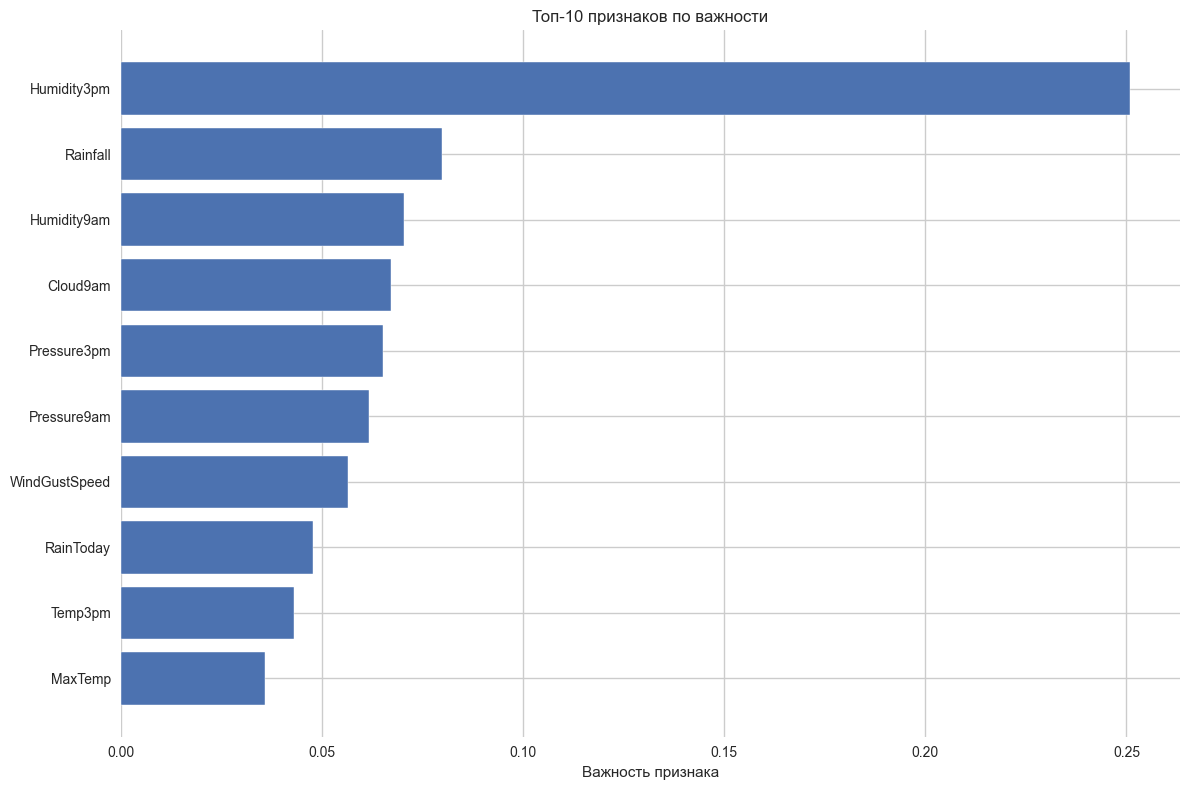

In [81]:
# Задание 4.12: Оценка значимости признаков с помощью случайного леса
print("="*60)
print("ОЦЕНКА ЗНАЧИМОСТИ ПРИЗНАКОВ")
print("="*60)

# Используем оптимизированную модель случайного леса (best_rf)
# Получаем важность признаков
feature_importances = best_rf.feature_importances_

# Создаем DataFrame для удобства анализа
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})

# Сортируем по важности (по убыванию)
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

print(f"\nВажность признаков (отсортировано по убыванию):")
print(feature_importance_df.head(20))

# Топ-3 признака с наибольшей важностью
top_3_features = feature_importance_df.head(3)

print(f"\n{'='*60}")
print("РЕЗУЛЬТАТ ДЛЯ ЗАДАНИЯ")
print(f"{'='*60}")
print(f"Три признака с наибольшим вкладом в целевую переменную:")
print()
for i, (idx, row) in enumerate(top_3_features.iterrows(), 1):
    print(f"{i}. {row['feature']}: {row['importance']:.6f} ({row['importance']*100:.2f}%)")

print(f"\n✅ Ответ для задания:")
print(f"Три признака с наибольшим вкладом:")
for i, (idx, row) in enumerate(top_3_features.iterrows(), 1):
    print(f"  {i}. {row['feature']}")

# Визуализация важности признаков (опционально)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
top_10 = feature_importance_df.head(10)
plt.barh(range(len(top_10)), top_10['importance'], align='center')
plt.yticks(range(len(top_10)), top_10['feature'])
plt.xlabel('Важность признака')
plt.title('Топ-10 признаков по важности')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
